# Economic Data Analysis with Fred & Pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
pd.set_option("display.max_columns", 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

# you get your API key by logging in into the the FRED website
fred_key = 'put your API key here'

# 1. Create The Fred Object

In [5]:
fred = Fred(api_key=fred_key)

# 2. Search for economic data!

In [6]:
sp_search = fred.search('S&P', order_by='popularity')

In [7]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2025-09-29,2025-09-29,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2025-09-25,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-09-26 09:01:09-05:00,97,The ICE BofA Option-Adjusted Spreads (OASs) ar...
SP500,SP500,2025-09-29,2025-09-29,S&P 500,2015-09-28,2025-09-26,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-09-26 19:02:05-05:00,92,The observations for the S&P 500 represent the...
CSUSHPINSA,CSUSHPINSA,2025-09-29,2025-09-29,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2025-06-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2025-08-26 08:12:01-05:00,86,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2025-09-29,2025-09-29,ICE BofA US High Yield Index Effective Yield,1996-12-31,2025-09-25,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-09-26 09:01:13-05:00,85,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2025-09-29,2025-09-29,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2025-09-24,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-09-25 07:20:16-05:00,83,The ICE BofA Option-Adjusted Spreads (OASs) ar...


# 3. Pull Raw Data & Plot

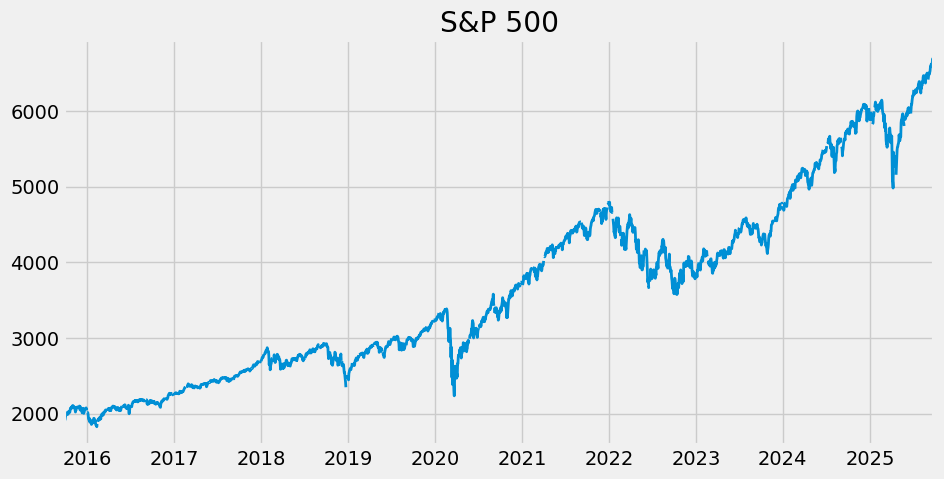

In [8]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)
plt.show()

# 4. Pull and Join Multiple Data Series

In [9]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [10]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
uemp_results = pd.concat(all_results, axis=1)

In [11]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [12]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [13]:
# Plot States Unemployment Rate
px.line(uemp_states)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=California<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'California',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'California',
              'showlegend': True,
              'type': 'scattergl',
              'x': array(['1976-01-01T00:00:00.000000000', '1976-02-01T00:00:00.000000000',
                          '1976-03-01T00:00:00.000000000', ..., '2025-06-01T00:00:00.000000000',
                          '2025-07-01T00:00:00.000000000', '2025-08-01T00:00:00.000000000'],
                         shape=(594,), dtype='datetime64[ns]'),
              'xaxis': 'x',
              'y': {'bdata': ('ZmZmZmZmIkBmZmZmZmYiQDMzMzMzMy' ... 'mZmZmZFUAAAAAAAAAWQAAAAAAAABZA'),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Texas<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Texas',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Texas',
              'showlegend': True,
              'type': 'scattergl',
              'x': array(['1976-01-01T00:00:00.000000000', '1976-02-01T00:00:00.000000000',
                          '1976-03-01T00:00:00.000000000', ..., '2025-06-01T00:00:00.000000000',
                          '2025-07-01T00:00:00.000000000', '2025-08-01T00:00:00.000000000'],
                         shape=(594,), dtype='datetime64[ns]'),
              'xaxis': 'x',
              'y': {'bdata': ('MzMzMzMzF0AzMzMzMzMXQJqZmZmZmR' ... 'AAAAAAEEAAAAAAAAAQQGZmZmZmZhBA'),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Florida<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Florida',
              'line': {'color': '#00cc96', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Florida',
              'showlegend': True,
              'type': 'scattergl',
              'x': array(['1976-01-01T00:00:00.000000000', '1976-02-01T00:00:00.000000000',
                          '1976-03-01T00:00:00.000000000', ..., '2025-06-01T00:00:00.000000000',
                          '2025-07-01T00:00:00.000000000', '2025-08-01T00:00:00.000000000'],
                         shape=(594,), dtype='datetime64[ns]'),
              'xaxis': 'x',
              'y': {'bdata': ('MzMzMzMzI0BmZmZmZmYjQDMzMzMzMy' ... 'mZmZmZDUCamZmZmZkNQGZmZmZmZg5A'),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'variable=New York<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'New York',
              'line': {'color': '#ab63fa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'New York',
              'showlegend': True,
              'type': 'scattergl',
              'x': array(['1976-01-01T00:00:00.000000000', '1976-02-01T00:00:00.000000000',
                          '1976-03-01T00:00:00.000000000', ..., '2025-06-01T00:00:00.000000000',
                          '2025-07-01T00:00:00.000000000', '2025-08-01T00:00:00.000000000'],
                         shape=(594,), dtype='datetime64[ns]'),
              'xaxis': 'x',
              'y': {'bdata': ('mpmZmZmZJECamZmZmZkkQGZmZmZmZi' ... 'AAAAAAEEAAAAAAAAAQQAAAAAAAABBA'),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Alabama<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Alabama',
              'line': {'color': '#FFA15A', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Alabama',
              'showl

# Pull April 2020 Unemployment Rate Per State

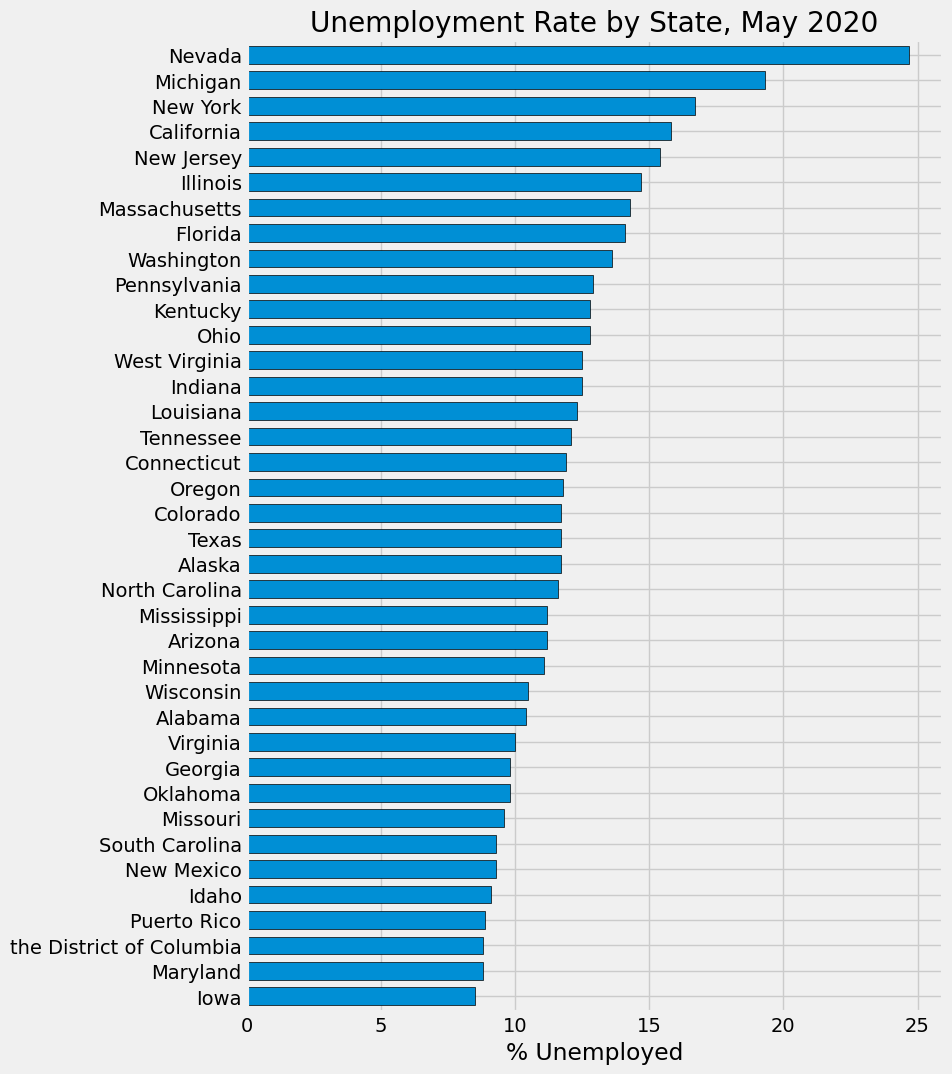

In [14]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

# Pull Participation Rate

In [15]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [16]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

# Plot Unemployment vs Participation for each state!

In [17]:
# Fix DC
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

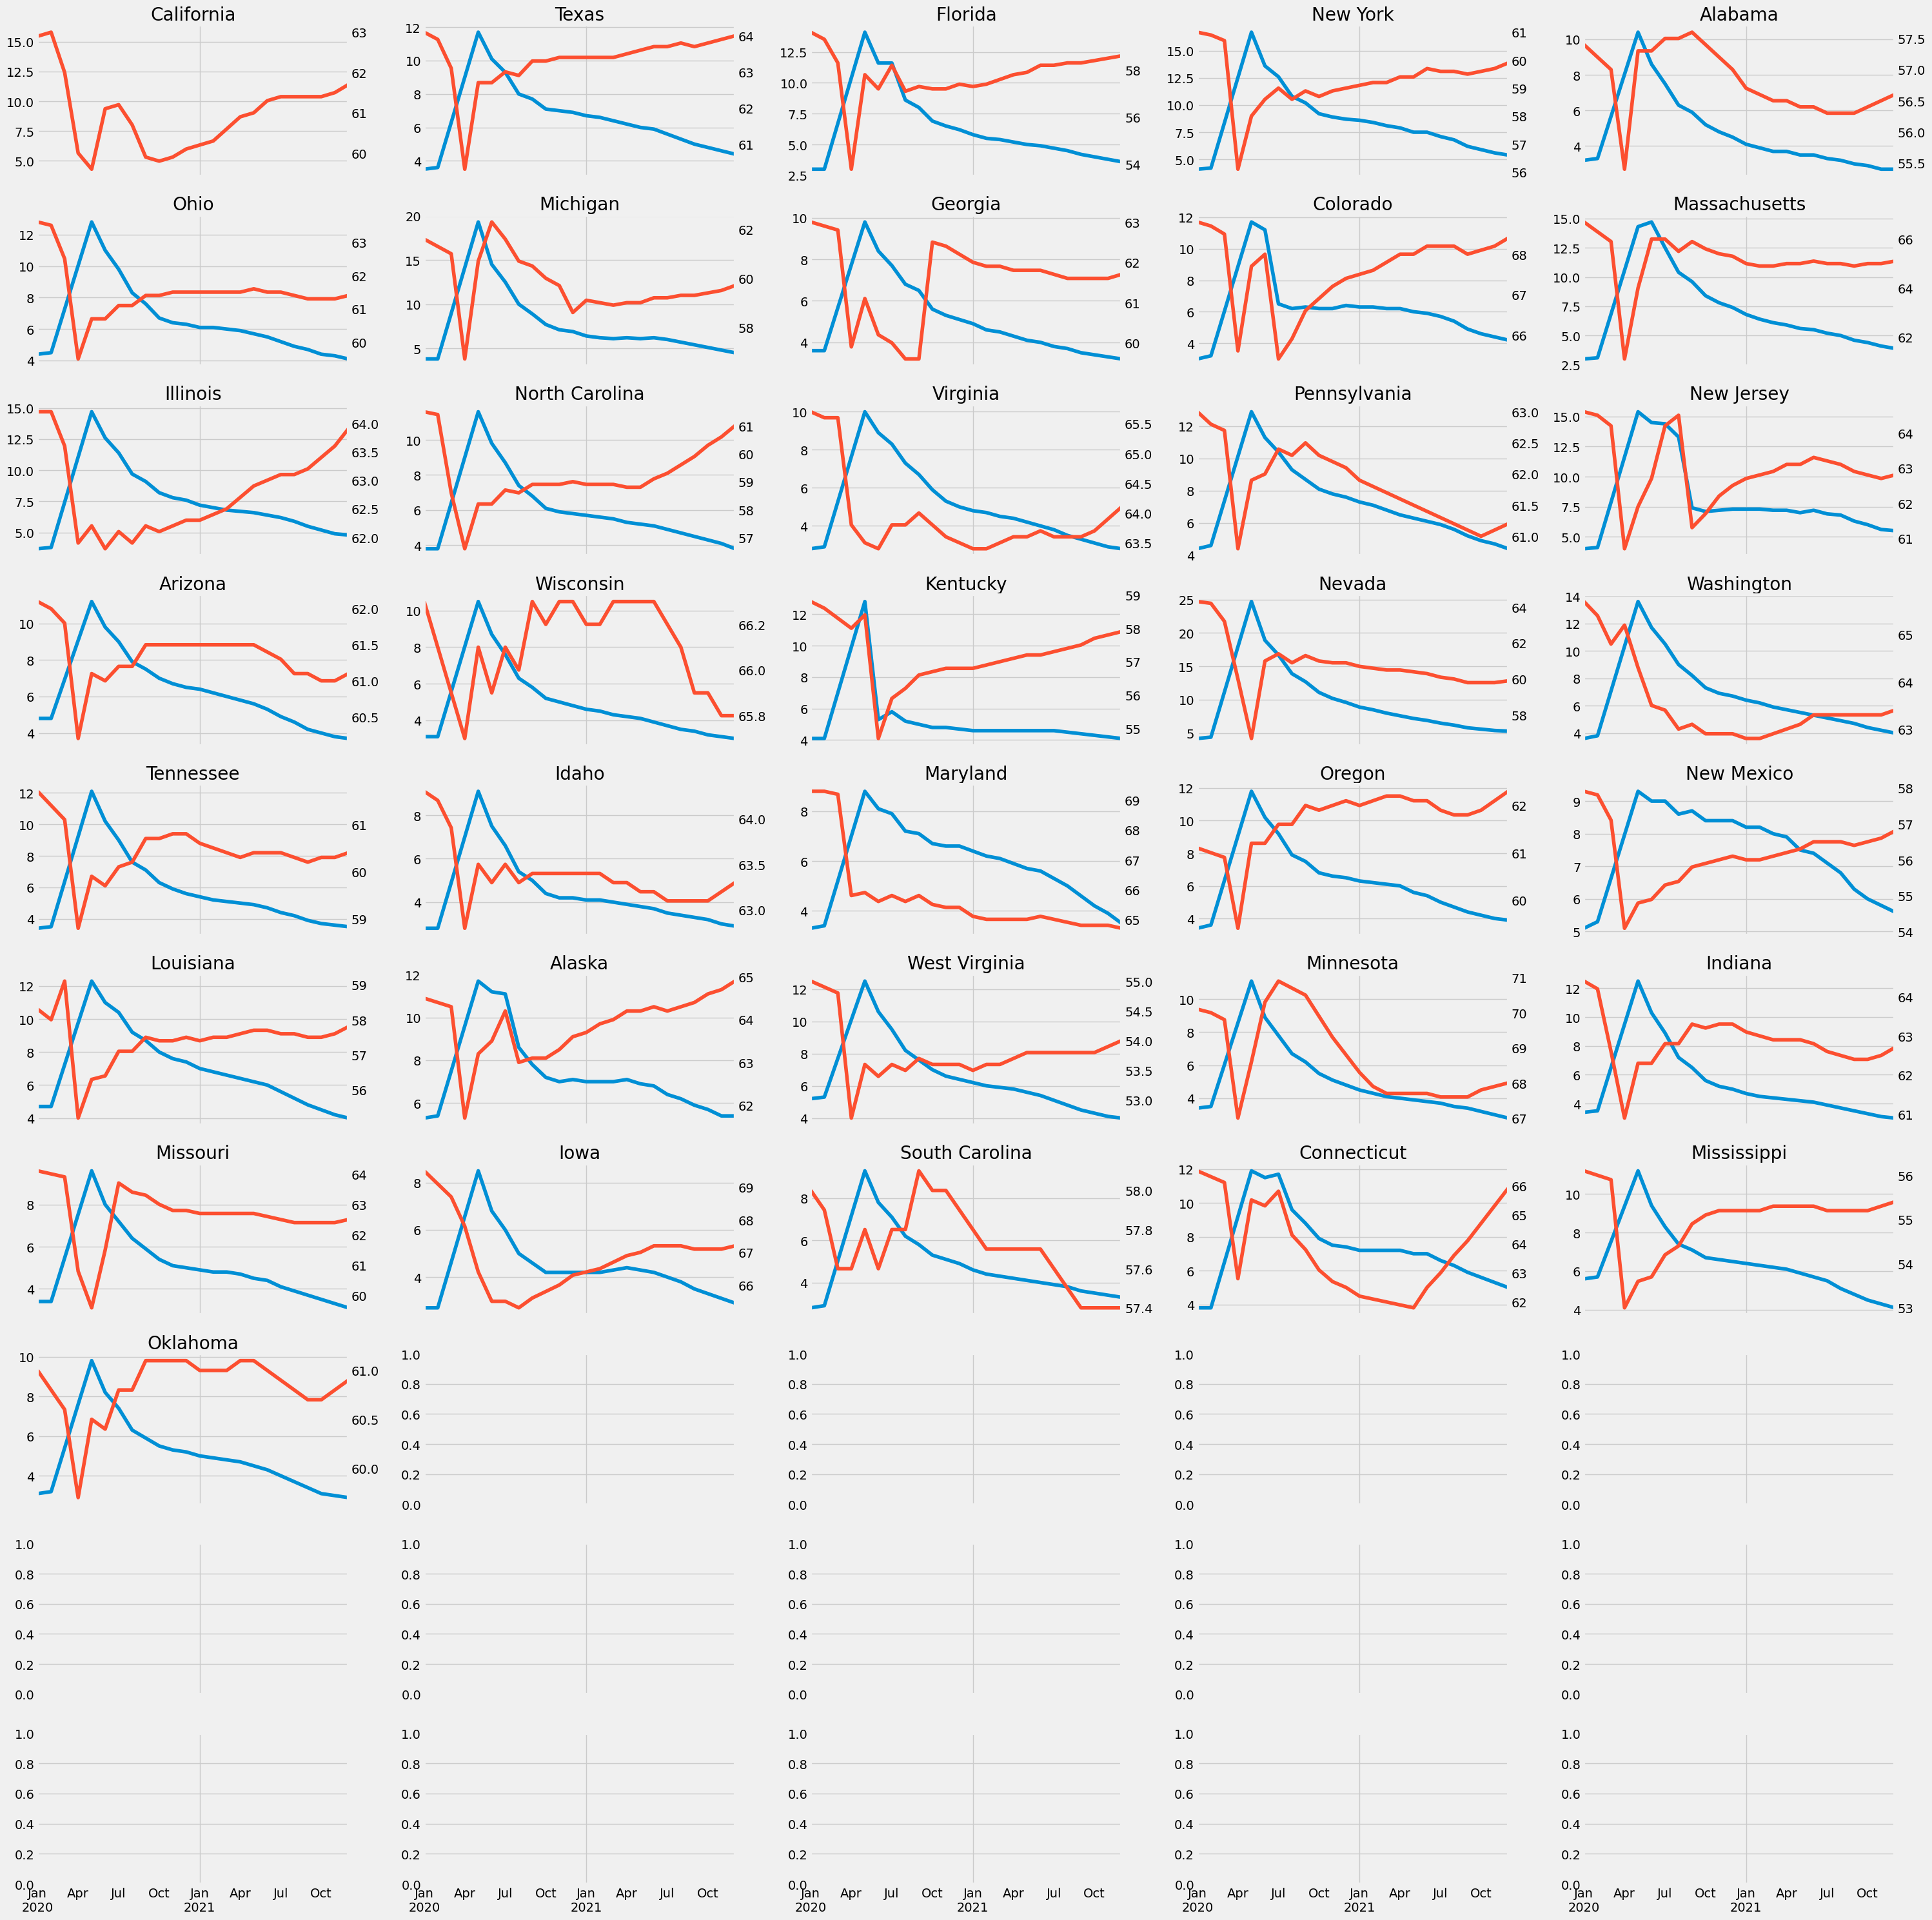

In [20]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

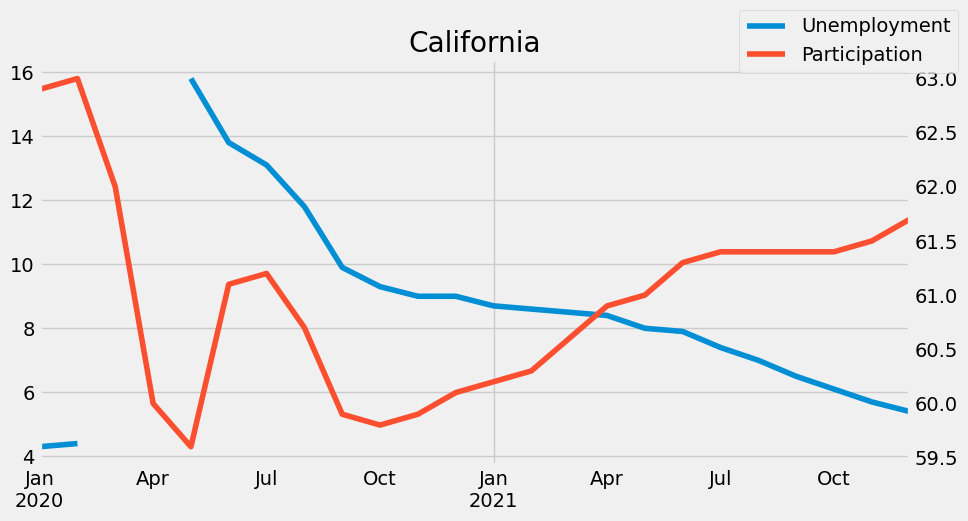

In [19]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()